In [1]:
# importing the dependencies modules
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import ta 
from tqdm import tqdm
from scipy.optimize import minimize
import warnings
warnings.filterwarnings("ignore")

In [2]:
# The code will allow you to switch between the dark and light mode in graphs

from matplotlib import cycler
colors = cycler('color',['#669FEE','#66EE91','#9988DD','#EECC55','#88BB44','#FFBBBB'])
plt.rc('figure',facecolor='#313233')
plt.rc('axes',facecolor='#313233',edgecolor='None',axisbelow=True,grid=True,prop_cycle=colors,labelcolor='gray')

plt.rc('grid',color='#47a4a4') #, linestlye='solid')
plt.rc('xtick',color='gray')
plt.rc('ytick',direction='out',color='gray')
plt.rc('legend',facecolor='#313233',edgecolor='#313233')
plt.rc('text',color='#c9c9c9')

In [3]:
# import the data
data = yf.download('GOOG')

[*********************100%***********************]  1 of 1 completed


In [ ]:
# compute the RSI
# the RSI is a momentum indicator
# if the RSI is above 70, it is considered overbought
# if the RSI is below 30, it is considered oversold

data['rsi'] = ta.momentum.RSIIndicator(data['Adj Close'],window=14).rsi()

In [ ]:
# Plot the RSI with overbought and oversold regions

# Adapt the size of the graph
plt.figure(figsize=(15,8))

# view the RSI
plt.plot(data['rsi'].loc['2010'])

# view the overbought through a horizontal line(i.e RSI > 70)
plt.axhline(70,color='red')

# view the oversold through a horizontal line(i.e RSI < 30)
plt.axhline(30,color='#CE5757')

# Title of the graph
plt.title('Relative Strength Index(RSI) with Threshold')

# legend of the graph
plt.legend(['RSI','Overbought','Oversold'])

# show the graph
plt.show()


In [ ]:
# Plot the RSI with Long Buy and Long Sell regions
# Adapt the size of the graph
plt.figure(figsize=(15,8))

# view the RSI
plt.plot(data['rsi'].loc['2021'])
# view the overbought through a horizontal line(i.e RSI > 70)
plt.fill_between(data['rsi'].loc['2021'].index,55,70 ,color='#57CE95', alpha=0.5)

# view the oversold through a horizontal line(i.e RSI < 30)
plt.fill_between(data['rsi'].loc['2021'].index, 45, 30, color="#CE5757", alpha=0.5)

# Title of the graph
plt.title('Relative Strength Index(RSI) with Zone of Long Buy and Long Sell')

# legend of the graph
plt.legend(['RSI','Long Buy Zone','Long Sell Zone'])

# show the graph
plt.show()

In [13]:
# We define the strategy to take a long buy or short sell
# We define a threshold
overbuy = 70
neutral_buy = 55

# Put nan values for the signal long columns
data['signal_long'] = np.nan
data['yesterday_rsi'] = data['rsi'].shift(1)

# we define a Open long signal(RSI yes<55 and RSI today>55)
data.loc[(data['rsi'] > neutral_buy ) & (data['yesterday_rsi']< neutral_buy),"signal_long"] = 1
# We define a Close long signal(RSI yes>55 and RSI today<55) False signal
data.loc[(data['rsi'] < neutral_buy ) & (data['yesterday_rsi'] > neutral_buy),"signal_long"] = 0

# We need to define the Close Long signal(Rsi yes>70 and RSI today<70) Over buy signal
data.loc[(data['rsi'] < overbuy ) & (data['yesterday_rsi'] > overbuy),'signal_long'] = 0

In [15]:
data['2006']

,Open,High,Low,Close,Adj Close,Volume,rsi,signal_long,yesterday_rsi,signal_short,pct,Position,return
Date,,,,,,,,,,,,,
2006-01-03,210.471100,217.021545,208.329132,216.802368,216.802368,26340763,62.432096,1.0,50.570310,NaN,0.049101,0.0,0.000000
2006-01-04,221.121185,223.641739,219.053925,221.788681,221.788681,30687394,66.665455,NaN,62.432096,NaN,0.022999,0.0,0.000000
2006-01-05,222.167267,224.931900,219.925659,224.777481,224.777481,21697624,68.925777,NaN,66.665455,NaN,0.013476,0.0,0.000000
2006-01-06,227.581970,234.371521,225.773743,231.960556,231.960556,35646914,73.565074,NaN,68.925777,NaN,0.031956,0.0,0.000000
2006-01-09,232.334152,235.816101,229.609375,232.578247,232.578247,25679694,73.925580,NaN,73.565074,NaN,0.002663,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-12-22,227.895798,228.463669,225.519699,226.939377,226.939377,8006498,34.608906,NaN,34.930821,NaN,-0.001359,-1.0,0.001359
2006-12-26,227.407623,228.877106,226.446228,227.910736,227.910736,4164150,36.588319,NaN,34.608906,NaN,0.004280,-1.0,-0.004280
2006-12-27,229.141129,233.166031,228.692810,233.141129,233.141129,8494721,46.057050,NaN,36.588319,0.0,0.022949,0.0,-0.022949


In [ ]:
# We plot all the signals

# Select all the signals in a index list to plot
index_open = data.loc[data["signal_long"] ==1].loc["2010"].index
index_close = data.loc[data["signal_long"] ==0].loc["2010"].index

# Adapt the size of the graph
plt.figure(figsize=(15,8))
# plot the points of the open long signal
plt.scatter(data.loc[index_open]['rsi'].index,data.loc[index_open]['rsi'].loc['2010'],color="#57CE95",marker="^")

# plot the points of the close long signal
plt.scatter(data.loc[index_close]['rsi'].index,data.loc[index_close]['rsi'].loc['2010'],color="#669FEE",marker="o")

# Plot the RSI
plt.plot(data['rsi'].loc['2010'].index, data['rsi'].loc['2010'], alpha=0.35)

# Show the graph
plt.show()

In [ ]:
# We define the strategy to take a short sell
# We define a threshold
oversell = 30
neutral_sell = 45

# Put nan values for the signal short columns
data['signal_long'] = np.nan
data['yesterday_rsi'] = data['rsi'].shift(1)

# We need to define the Open short signal(Rsi yes>45 and RSI today<45)
data.loc[(data['rsi']<neutral_sell) & (data['yesterday_rsi']>neutral_sell),'signal_short'] = -1

# We need to define the Close short signal(Rsi yes<4530 and RSI today>45) False signal
data.loc[(data['rsi']>neutral_sell) & (data['yesterday_rsi']<neutral_sell),'signal_short'] = 0

# We need to define the Close short signal(Rsi yes<4530 and RSI today>45) False signal
data.loc[(data['rsi']>oversell) & (data['yesterday_rsi']<oversell),'signal_short'] = 0
data

In [ ]:
# We plot all the signals
# Select all the signals in a index list to plot
index_open = data.loc[data["signal_short"] ==-1].loc["2010"].index
index_close = data.loc[data["signal_short"] ==0].loc["2010"].index

# Adapt the size of the graph
plt.figure(figsize=(15,8))
# plot the points of the open long signal
plt.scatter(data.loc[index_open]['rsi'].index,data.loc[index_open]['rsi'].loc['2010'],color="#CE5757",marker="v")

# plot the points of the close long signal
plt.scatter(data.loc[index_close]['rsi'].index,data.loc[index_close]['rsi'].loc['2010'],color="#669FEE",marker="o")

# Plot the RSI
plt.plot(data['rsi'].loc['2010'].index, data['rsi'].loc['2010'], alpha=0.35)

# Show the graph
plt.show()
data['2010']

In [ ]:
data['Position'] = (data['signal_short'].fillna(method='ffill') + data['signal_long'].fillna(method='ffill'))
data.dropna(thresh=10)
data

In [ ]:
# We plot all the signals

year = '2010'
idx_long = data.loc[data['Position']==1].loc[year].index
idx_short = data.loc[data['Position']==-1].loc[year].index

plt.figure(figsize=(15,8))

# Plot the points of short signal
plt.scatter(data.loc[idx_short]['Adj Close'].index, data.loc[idx_short]['Adj Close'].loc[year],color='#CE5757',marker='v')

# Plot the points of long signal
plt.scatter(data.loc[idx_long]['Adj Close'].index, data.loc[idx_long]['Adj Close'].loc[year],color='#57CE95',marker='^')

# Plot the Google stock price to meet the completion
plt.plot(data['Adj Close'].loc[year].index,data['Adj Close'].loc[year],alpha=0.35)

# Plot the graph
plt.show()


In [ ]:
# Compute % Variations
data['pct'] = data['Adj Close'].pct_change(1)

# Compute teh return of the strategy

data['return'] = data['pct']*(data['Position'].shift(1))
data['return'].loc['2010'].cumsum().plot(figsize=(15,8))

In [16]:
# Function to do RSI strategy
def rsi(val,neutral,window):
    """

    Input:
    :param val: (type dataframe pandas): Entry values of the stock
    :param neutral:(float) Value of the neutrality, i.e No Action Zone
    :param window: (float) rolling period for RSI calculation

    Output: The function gives the returns of RSI strategy
    :return:
    """
    # Print error is no Adj Close column is not present
    if "Adj Close" not in val.columns:
        ValueError("Error: No Adj Close column is present")

    val['rsi'] = ta.momentum.RSIIndicator(val['Adj Close'], window=window).rsi()

    """Long Buy signal"""
    overbuy = 70
    neutral_buy = 50 + neutral

    # Put nan values for te signal long columns
    val['signal_long'] = np.nan
    val['yesterday_rsi'] = val['rsi'].shift(1)
    # We need to define open long signal (Rsi yes>55 and RSI today>55)
    val.loc[(val['rsi']> neutral_buy) & (val['yesterday_rsi'] <neutral_buy),'signal_long'] = 1
    # open long signal for false positive (Rsi yes>55 and RSI today<55)
    val.loc[(val['rsi']< neutral_buy) & (val['yesterday_rsi'] >neutral_buy),'signal_long'] = 0
    # open long signal for overbuy (Rsi yes>70 and RSI today<70)
    val.loc[(val['rsi']< overbuy) & (val['yesterday_rsi'] >overbuy),'signal_long'] = 0

    """Short Sell signal"""
    oversell = 30
    neutral_sell = 50 - neutral

    # Put the values for the short signal columns
    val['signal_short'] = np.nan

    # We define the Open short signal (RSI yes>45 and RSI today<45)
    val.loc[(val['rsi']<neutral_sell) & (val['yesterday_rsi']>neutral_sell),'signal_short'] = -1

    # We define the Close short signal(Rsi yes<45 and RSI today>45) False signal
    val.loc[(val['rsi']>neutral_sell) & (val['yesterday_rsi']<neutral_sell),'signal_short'] = 0

    # We define the Close short signal (RSI yes<30 and RSI today>30) Oversell
    val.loc[(val['rsi']>oversell) & (val['yesterday_rsi']<oversell),'signal_short'] = 0

    """Compute the returns"""
    # Compute the percentage of the variation of the stock
    val['pct'] = val['Adj Close'].pct_change(1)

    # Calculate the position
    val['Position'] = (val['signal_short'].fillna(method='ffill') + val['signal_long'].fillna(method='ffill'))

    # Compute the returns
    val['return'] = val['pct']*(val['Position'].shift(1))

    return val['return']

<AxesSubplot:xlabel='Date'>

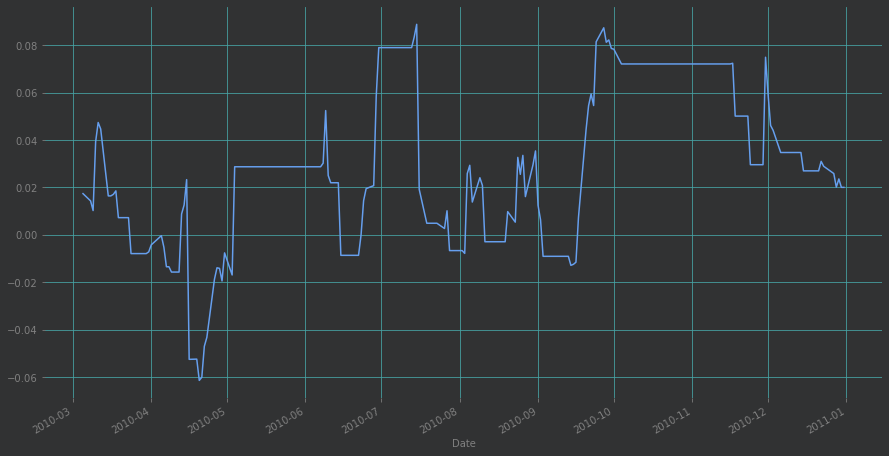

In [18]:
# test
returns= rsi(data['2010'],5,14)
returns.cumsum().plot(figsize=(15,8))